# Estimating VaR

## Methods for Computing VaR

There are at least four standard methods for caluclating VaR:

1. Historical (non parametric)
2. Variance-Covariance (parametric gaussian)
3. Parametric non gaussian 
4. Cornish-Fisher (semi-parametric)

### Historical Methodology 

Calculation of VaR based on the distribution of historical changes in the value of the current portfolio under market proces above the specified historical observation window. 

In this methodology there no assumptions or models used, keeping the model risk low. However, because the methodology solely relies on historical data it means that there is a high sample risk.

### Parametric Gaussian Methodology 

Calculation of VaR based on portfolio volatility, i.e., on volatilities and correlations of components. This method assumes a gaussian distribution and is what makes it parametric. We assume something about the distribution and then focus on estimating parameters of that assumption. In this methodology we only need to estimate the mean and volatility of the distribution.

Consider $Z_\alpha$ the $\alpha$-quantile of the standard normal distribution. For example $Z_\alpha = -1.65$ at ~5%.

We relate $Z_\alpha$ and $\alpha$ via the following equation

$$\int^{Z_\alpha}_{- \infty} \frac{1}{\sigma \sqrt{2 \pi}} \exp \left (\frac{-x^2}{2\sigma^2}\right) \mathop{\mathrm{d}x} = \alpha.$$

$Z_\alpha$ is the outcome which is such that there is only $\alpha$ percent chance to get below that quantity.

We then work in the normalised distribution of returns, so if asset returns are actually normally distributed we get the standard normal distribution for which we know the behaviour of at certain $\alpha$ confidence levels.

$$\Pr \left (\frac{R_p - \mu_p}{\sigma_p} \leq z_{\alpha} \right ) = \alpha \Leftrightarrow \Pr \left (R \leq \mu_p + z_{\alpha}\sigma_p\right) = \alpha$$

Finally, the VaR is given by

$$VaR_\alpha = -(\mu + z_\alpha\sigma),$$

where $\mu$ and $\sigma$ are simply our estimates for the mean and volatility respectively.

Assuming that asset return distributions are normal may understate the risk. We know previously that asset return distribution are generally not anywhere close to being normally distributed. This methodology brings a greater model risk due to this.

### Parametric non Gaussian Methodology

Parametric is good becuase it mitigates the problem of estimation risk but at the cost of model risk. In this methodolgy we will still parametrise but assume a non gaussian distribution of which there are many to choose from.

### Cornish-Fisher (semi-parametric) Methodology

An alternative to the parametric approach exists; semi-parametrick. The Cornish-Fisher method allows for a 'best of both worlds' method which does not force you to assume a model for your distribtion. The Cornish-Fisher expansion (1937), shown below, is used to relate the $\alpha$-quantile of non gaussian distributions with to the $\alpha$-quantile of a gaussian distribution.

$$\tilde{z}_\alpha = z_\alpha + \frac16 \left ( z^{2}_{\alpha} - 1 \right )S + \frac{1}{24} \left ( z^{3}_{\alpha} - 3z_\alpha \right )\left(K-3\right) - \frac{1}{36} \left ( 2z^{3}_{\alpha} - 5z_\alpha \right )S^2$$

$\tilde{z}_\alpha$ is the $\alpha$-quantile of the non gaussian distribution and it is expressed in terms of $z_\alpha$ which is the $\alpha$-quantile of the guassian distribution. $S$ and $K$ as we have seen before are the skewness and excess kurtosis of the non gaussian distribution.

In the non gaussian case, skewness is 0 and the kurtosis is 3, meaning that the Cornish-Fisher expansion will just return the guassian distribution on the rhs. In this case we would find the same VaR as if we were just using the gaussian method. In the many cases where skewness is typically negative and the kurtosis is higher than 3, the Cornish-Fisher method will give you a VaR which is generally higher than the gaussian estimate. This tells us that there is a greater probability of getting a negative outcome.

VaR in the non gaussian setting is given by

$$VaR_{mod}\left (1 -\alpha\right) = -\left(\mu + \tilde{z}_\alpha \sigma\right).$$

# Lab Session - Semi Deviation, VaR and CVaR

## Downside!

In [38]:
import pandas as pd
import numpy as np
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
hfi = erk.get_hfi_returns()

### Semideviation

In [3]:
hfi.std(ddof = 0)

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [7]:
# filter for returns less than 0 as we are only interested in the volatility of negative returns
hfi[hfi<0].std(ddof = 0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [10]:
# add function to edhec risk kit
erk.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

## VaR and CVaR

### Historic VaR

In [13]:
np.percentile(hfi, 5, axis = 0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [19]:
def var_historic(r, level = 5):
    '''
    VaR Historic
    '''
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level = level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError('Expected r to be Series or DataFrame')

In [20]:
var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [22]:
# add function to edehc risk kit
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

### Gaussian VaR

In [23]:
from scipy.stats import norm 

In [29]:
# returns z scores of normal dist given percent level
z = norm.ppf(0.05)
z

-1.6448536269514729

In [33]:
-(hfi.mean() + z*hfi.std(ddof = 0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [36]:
# add function to edhec risk kit
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

### Cornish-Fisher VaR

In [42]:
# add modified parameter to var_gaussian for cornish fisher method
erk.var_gaussian(hfi, modified = True)

Convertible Arbitrage     0.029494
CTA Global                0.033120
Distressed Securities     0.026183
Emerging Markets          0.054672
Equity Market Neutral     0.012109
Event Driven              0.026763
Fixed Income Arbitrage    0.024598
Global Macro              0.014115
Long/Short Equity         0.028049
Merger Arbitrage          0.013240
Relative Value            0.017576
Short Selling             0.067213
Funds Of Funds            0.021652
dtype: float64

<AxesSubplot:title={'center':'EDHEC Hedge Fund Indices: VaR'}>

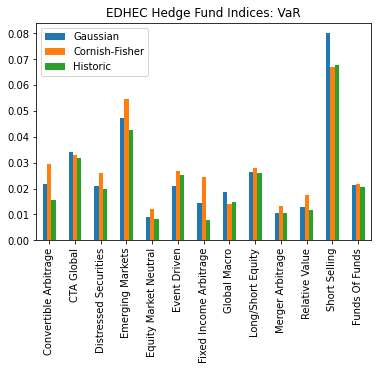

In [43]:
var_list = [erk.var_gaussian(hfi), erk.var_gaussian(hfi, modified = True), erk.var_historic(hfi)]
comparison = pd.concat(var_list, axis = 1)
comparison.columns = ['Gaussian', 'Cornish-Fisher', 'Historic']
comparison.plot.bar(title = 'EDHEC Hedge Fund Indices: VaR')

## Beyond VaR aka CVaR

CvaR is just nothing more than the average of all the returns which are worse than the VaR

In [45]:
erk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64

In [46]:
erk.cvar_gaussian(hfi)

Convertible Arbitrage     0.049687
CTA Global                0.043527
Distressed Securities     0.040864
Emerging Markets          0.083820
Equity Market Neutral     0.018292
Event Driven              0.037440
Fixed Income Arbitrage    0.052500
Global Macro              0.025783
Long/Short Equity         0.043162
Merger Arbitrage          0.019143
Relative Value            0.026733
Short Selling             0.106620
Funds Of Funds            0.034185
dtype: float64

In [47]:
erk.cvar_gaussian(hfi, modified = True)

Convertible Arbitrage     0.064320
CTA Global                0.042000
Distressed Securities     0.055600
Emerging Markets          0.105450
Equity Market Neutral     0.023814
Event Driven              0.041809
Fixed Income Arbitrage    0.052500
Global Macro              0.019244
Long/Short Equity         0.044558
Merger Arbitrage          0.023400
Relative Value            0.030767
Short Selling             0.096821
Funds Of Funds            0.034185
dtype: float64